# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [2]:
env = gym.make('Pendulum-v0')

# random_seed = 10
# env.seed(random_seed)

# from agent import Agent
# agent = Agent(state_size=env.observation_space.shape[0], action_size=env.action_space.shape[0], 
#               random_seed=random_seed)

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [3]:
env.action_space, env.observation_space

(Box(1,), Box(3,))

In [4]:
action_size = env.action_space.shape[0]
state_size = env.observation_space.shape[0]

In [5]:
action_size, state_size

(1, 3)

In [6]:
env.observation_space.low, env.observation_space.high

(array([-1., -1., -8.], dtype=float32), array([1., 1., 8.], dtype=float32))

In [7]:
env.action_space.low, env.action_space.high

(array([-2.], dtype=float32), array([2.], dtype=float32))

In [8]:
env.reward_range

(-inf, inf)

### 3. Instantiate DAQLAgent

In [9]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [10]:
# GAMMA = 0.99     # discount factor
# LR = 1e-3        # learning rate of the critic
# BATCH_SIZE = 1024         # minibatch size/ RAM size
# BUFFER_SIZE = int(1e6)  # replay buffer size
# random_seed = 10 # random seed for result reproducibility
# h_size = 400 # hidden layer size

In [11]:
# BUFFER_SIZE = int(1e5)  # replay buffer size
# BATCH_SIZE = 128        # minibatch size
# GAMMA = 0.99            # discount factor
# TAU = 1e-3              # for soft update of target parameters
# LR_ACTOR = 1e-4         # learning rate of the actor 
# LR_CRITIC = 1e-3        # learning rate of the critic
# WEIGHT_DECAY = 0        # L2 weight decay

In [12]:
BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 128        # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR = 1e-4        # learning rate
h_size = 400 # hidden layer size
random_seed = 10 # random seed for result reproducibility

In [13]:
# random_seed = 10
env.seed(random_seed)

[10]

In [14]:
from agent import Agent

agent = Agent(s_size=state_size, a_size=action_size, h_size=400, random_seed=random_seed, gamma=GAMMA, 
              lr=LR, batch_size=BATCH_SIZE, buffer_size=BUFFER_SIZE, device=device)

### 4. Train the Agent with DAQL

In [15]:
from collections import deque
import numpy as np
import time
import torch

n_episodes=100000
# n_steps=1000
# n_learn=10
# learn_every=20
R_goal=0 # TOCHECK
Rs_deque = deque(maxlen=100)
meanRs = [] # plot
list_episodes = []

In [ ]:
for i_episode in range(n_episodes):
    
    s = env.reset() # s: state
    #print(s.shape)

    # initialize the score (for each agent)
    R = 0 # R: total reward
    list_steps = []

    #for i_step in range(n_steps):
    while True:
        
        s = np.reshape(s, [1, -1])
        a = agent.act(s) # a=[-2, 2]
        a *= 2
        #print(a.shape)
        
        a = np.reshape(a, [-1])
        s2, r, done, _ = env.step(a)
        #print(s2.shape, r, done)

        s = np.reshape(s, [-1])
        agent.memory.add(s, a, r, s2, done)

        R += r                           # update the score (for each agent)
        s = s2                                # roll over states to next time step

        # if i_step%learn_every == 0:
        # for _ in range(n_learn):
        gloss, dloss, reward, reward_in = agent.start_learn()
        list_steps.append([gloss, dloss, reward, reward_in])
                
        # Exit loop if episode is done/finished for any of the agents among all of them
        if done:
            break

    Rs_deque.append(np.mean(R))
    
    print('Episode:{}, Total Average Score:{:.2f}'.format(i_episode+1, np.mean(Rs_deque)),
          'gloss:{:.2f}'.format(np.mean(list_steps, axis=0)[0]), 
          'dloss:{:.2f}'.format(np.mean(list_steps, axis=0)[1]),
          'reward:{:.5f}'.format(np.mean(list_steps, axis=0)[2]), 
          'reward_in:{:.5f}'.format(np.mean(list_steps, axis=0)[3]))
    
    # Plotting
    list_episodes.append([np.mean(Rs_deque),
                          np.mean(list_steps, axis=0)[0], # gloss
                          np.mean(list_steps, axis=0)[1], # dloss
                          np.mean(list_steps, axis=0)[2], # reward
                          np.mean(list_steps, axis=0)[3]]) # reward_in

    if np.mean(Rs_deque) >= R_goal:
        torch.save(agent.g.state_dict(), 'g-pendulum.pth')
        torch.save(agent.d.state_dict(), 'd-pendulum.pth')
        break

Episode:1, Total Average Score:-881.72 gloss:211.60 dloss:-0.05 reward:-1.65297 reward_in:0.00048
Episode:2, Total Average Score:-1356.70 gloss:756.62 dloss:-0.13 reward:-5.91269 reward_in:0.00135
Episode:3, Total Average Score:-1479.92 gloss:894.68 dloss:-0.12 reward:-6.99311 reward_in:0.00134
Episode:4, Total Average Score:-1444.99 gloss:928.00 dloss:-0.10 reward:-7.25464 reward_in:0.00134
Episode:5, Total Average Score:-1430.92 gloss:918.87 dloss:-0.09 reward:-7.18468 reward_in:0.00134
Episode:6, Total Average Score:-1423.37 gloss:910.70 dloss:-0.07 reward:-7.12234 reward_in:0.00133
Episode:7, Total Average Score:-1422.12 gloss:910.18 dloss:-0.05 reward:-7.11968 reward_in:0.00134
Episode:8, Total Average Score:-1428.57 gloss:900.05 dloss:-0.03 reward:-7.04224 reward_in:0.00133
Episode:9, Total Average Score:-1438.75 gloss:912.97 dloss:-0.01 reward:-7.14460 reward_in:0.00133
Episode:10, Total Average Score:-1453.30 gloss:921.91 dloss:0.02 reward:-7.21557 reward_in:0.00133
Episode:11,

### 5. Plot the result

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
np.array(list_episodes).T.shape

(5, 10000)

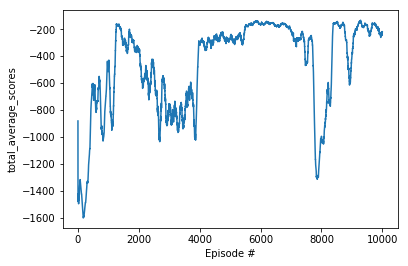

In [20]:
arr = np.array(list_episodes).T[0]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(np.arange(1, len(arr)+1), arr)
plt.ylabel('total_average_scores')
plt.xlabel('Episode #')
plt.show()

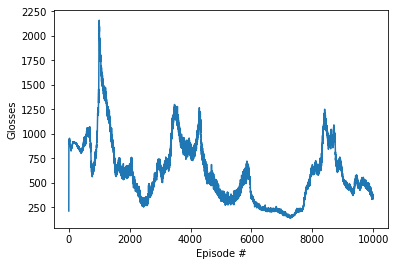

In [22]:
arr = np.array(list_episodes).T[1]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(np.arange(1, len(arr)+1), arr)
plt.ylabel('Glosses')
plt.xlabel('Episode #')
plt.show()

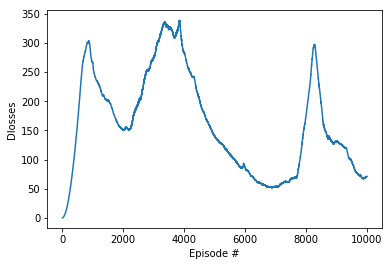

In [23]:
arr = np.array(list_episodes).T[2]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(np.arange(1, len(arr)+1), arr)
plt.ylabel('Dlosses')
plt.xlabel('Episode #')
plt.show()

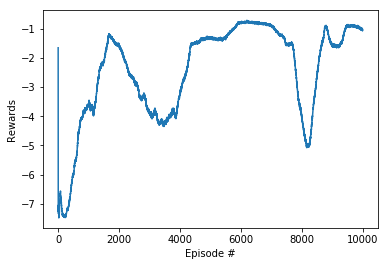

In [24]:
arr = np.array(list_episodes).T[3]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(np.arange(1, len(arr)+1), arr)
plt.ylabel('Rewards')
plt.xlabel('Episode #')
plt.show()

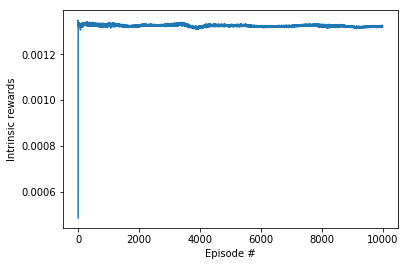

In [25]:
arr = np.array(list_episodes).T[4]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(np.arange(1, len(arr)+1), arr)
plt.ylabel('Intrinsic rewards')
plt.xlabel('Episode #')
plt.show()

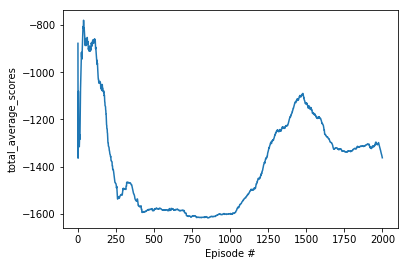

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(np.arange(1, len(meanRs)+1), meanRs)
plt.ylabel('total_average_scores')
plt.xlabel('Episode #')
plt.show()

### 6. Watch the agent running with saved weights

In [14]:
# Load the saved weights into Pytorch model
agent.g.load_state_dict(torch.load('g-pendulum.pth', map_location='cpu'))
agent.d.load_state_dict(torch.load('d-pendulum.pth', map_location='cpu'))

# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# S = env_info.vector_observations                  # get the current states (S) (for each agent)
s = env.reset() # s: state # get the current state (s) (for an agent)

#Rs = np.zeros(num_agents)                          # initialize the total scores (Rs) (for each agent)
R = 0 # R:total reward # initialize the total score (R) (for an agent)

while True:
    #A = agent.act(S)                        # select actions (A) from loaded model agents
    a = agent.act(np.reshape(s, [1, -1])) # a: [-1, +1]    # select action (a) from loaded model agent
    
    # env_info = env.step(A)[brain_name]           # send all actions (A) to tne environment (env)
    # S2 = env_info.vector_observations         # get next states (S2) (for each agent)
    # rewards = env_info.rewards                         # get rewards (for each agent)
    # dones = env_info.local_done                        # see if the episode is done/finished (terminal)
    s2, r, done, _ = env.step(np.reshape(a, [-1]))
    
    # Rs += env_info.rewards                         # update the total scores (Rs) (for each agent)
    # S = S2                               # roll over current states (S) to next states (S2)
    R += r # update the total score (R) (for an agent)
    s = s2 # roll over current state (s) to next state (s2)
    
    #if np.any(dones):                                  # exit loop if episode is done/finished
    if done: # exit loop if episode is done/finished (terminal)
        break
        
print('Average of total scores: {}'.format(R))

FileNotFoundError: [Errno 2] No such file or directory: 'g-pendulum.pth'

When finished, you can close the environment.

In [6]:
env.close()